In [1]:
!pip install tweepy
!pip install vaderSentiment
!pip install python-louvain

In [2]:
import csv
import re
import string
import random

with open('C:/Users/Admin/Downloads/33l dataset/33l dataset/Syncs/Syncs/Sync4_#thailand.csv', encoding="utf8") as csvfile:
    data = list(csv.reader(csvfile))

list_of_tweets = []
for i in range(1, len(data)):
    
    tweet = data[i][3]

    # remove \n from the end after every sentence
    tweet = tweet.strip('\n')

    # Remove any word that starts with the symbol @
    tweet = " ".join(filter(lambda x: x[0] != '@', tweet.split()))

    # Remove any URL
    tweet = re.sub(r"http\S+", "", tweet)
    tweet = re.sub(r"www\S+", "", tweet)

    # remove colons from the end of the sentences (if any) after removing url
    tweet = tweet.strip()
    tweet_len = len(tweet)
    if tweet_len > 0:
        if tweet[len(tweet) - 1] == ':':
            tweet = tweet[:len(tweet) - 1]

    # Remove any hash-tags symbols
    tweet = tweet.replace('#', '')

    # Convert every word to lowercase
    tweet = tweet.lower()

    # remove punctuations
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))

    # trim extra spaces
    tweet = " ".join(tweet.split())

    # convert each tweet from string type to as list<string> using " " as a delimiter
    list_of_tweets.append(tweet.split(' '))
tweets_exp=[]
tweets_abs=[]
if len(list_of_tweets)>500:
    indexes=random.sample(range(1,len(list_of_tweets)),500)
    for i in range(len(indexes)):
        tweets_exp.append(list_of_tweets[indexes[i]])
    for i in range(len(indexes)):
        tweets_abs.append(list_of_tweets[indexes[i]])
else:
    for i in range(len(list_of_tweets)):
        tweets_exp.append(list_of_tweets[i])
    for i in range(len(list_of_tweets)):
        tweets_abs.append(list_of_tweets[i])
    

In [3]:
print('found %d tweets' % len(list_of_tweets))

found 227 tweets


In [4]:
#getting expression words from pwords and nwords file

f = open('C:/Users/Admin/Jaccard_Similarity/Health_Tweets/pwords.txt', "r", encoding="utf8")
pwords = list(f)
    
f = open('C:/Users/Admin/Jaccard_Similarity/Health_Tweets/nwords.txt', "r", encoding="utf8")
nwords = list(f)

for i in range(len(pwords)):
    pwords[i] = pwords[i].strip('\n')
for i in range(len(nwords)):
    nwords[i] = nwords[i].strip('\n')

In [5]:
#removing expression words from tweets
for n,text in enumerate(tweets_abs):  
    ntext = []
    for word in text:
        if word not in pwords and word not in nwords:
            ntext.append(word) 
    tweets_abs[n] = ntext
    
for n,text in enumerate(tweets_exp):  
    ntext = []
    for word in text:
        if word in pwords or word in nwords:
            ntext.append(word) 
    tweets_exp[n] = ntext
    

tweets_abs = [' '.join(i) for i in tweets_abs]
tweets_exp = [' '.join(i) for i in tweets_exp]

In [6]:
tweets_exp

['',
 '',
 '',
 '',
 '',
 'beauty inspiration',
 '',
 'giddy',
 '',
 '',
 'amazing',
 'respect',
 '',
 '',
 '',
 '',
 'fun',
 '',
 '',
 '',
 'enlightenment',
 '',
 'ready extraordinary',
 '',
 'respect',
 '',
 '',
 '',
 'lemon',
 '',
 '',
 '',
 '',
 '',
 'good',
 '',
 'ready',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'good',
 'dirty',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'lovely',
 '',
 'beautiful',
 '',
 'amazing beautiful',
 '',
 '',
 '',
 '',
 '',
 '',
 'sweet',
 'paradise',
 '',
 '',
 '',
 'modern',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'sweet',
 '',
 '',
 '',
 'ready',
 'good',
 '',
 '',
 '',
 'delicious',
 '',
 '',
 '',
 'gold',
 '',
 'paradise',
 '',
 '',
 'paradise',
 '',
 '',
 '',
 'happy',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'passion',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'hell',
 'beauty beauty',
 '',
 '',
 '',
 'beautiful hot',
 '',
 '',
 '',
 '

In [7]:
#working on abstraction score(tweets_abs)........................................................................

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_vectorizer = TfidfVectorizer()
sparse_matrix = tfidf_vectorizer.fit_transform(tweets_abs)

doc_term_matrix = sparse_matrix.todense()
df_abs = pd.DataFrame(doc_term_matrix, 
                  columns=tfidf_vectorizer.get_feature_names())
print(doc_term_matrix)
print(cosine_similarity(df_abs))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[1.         0.01472703 0.00481861 ... 0.02389866 0.16525889 0.00365237]
 [0.01472703 1.         0.01540279 ... 0.13994389 0.01534158 0.01167487]
 [0.00481861 0.01540279 1.         ... 0.02499527 0.00501969 0.00381996]
 ...
 [0.02389866 0.13994389 0.02499527 ... 1.         0.02489594 0.01894569]
 [0.16525889 0.01534158 0.00501969 ... 0.02489594 1.         0.00380478]
 [0.00365237 0.01167487 0.00381996 ... 0.01894569 0.00380478 1.        ]]


In [9]:
import matplotlib.pyplot as plt
import networkx as nx

Gabs = nx.Graph()

l = len(tweets_abs)
for i in range(l):
    for j in range(i+1, l):
        if cosine_similarity(df_abs)[i][j] != 0:
            print(i, j)
            Gabs.add_edge(str(i), str(j), weight = cosine_similarity(df_abs)[i][j])

e = [(u, v) for (u, v, d) in Gabs.edges(data=True)]
#esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(Gabs)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(Gabs, pos, node_size=200)

# edges
nx.draw_networkx_edges(Gabs, pos, edgelist=e,
                       width=.3)
# labels
nx.draw_networkx_labels(Gabs, pos, font_size=10, font_family='sans-serif')

plt.axis('off')
plt.show()

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 183
0 184
0 18

6 163
6 164
6 165
6 166
6 167
6 168
6 169
6 170
6 171
6 172
6 173
6 174
6 175
6 176
6 177
6 178
6 179
6 180
6 181
6 182
6 183
6 184
6 185
6 186
6 187
6 188
6 189
6 190
6 191
6 192
6 193
6 194
6 195
6 196
6 197
6 198
6 199
6 200
6 201
6 202
6 203
6 204
6 205
6 206
6 207
6 208
6 209
6 210
6 211
6 212
6 213
6 214
6 215
6 216
6 217
6 218
6 219
6 220
6 221
6 222
6 223
6 224
6 225
6 226
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
7 16
7 17
7 18
7 19
7 20
7 21
7 22
7 23
7 24
7 25
7 26
7 27
7 28
7 29
7 30
7 31
7 32
7 33
7 34
7 35
7 36
7 37
7 38
7 39
7 40
7 41
7 42
7 43
7 44
7 45
7 46
7 47
7 48
7 49
7 50
7 51
7 52
7 53
7 54
7 55
7 56
7 57
7 58
7 59
7 60
7 61
7 62
7 63
7 64
7 65
7 66
7 67
7 68
7 69
7 70
7 71
7 72
7 73
7 74
7 75
7 76
7 77
7 78
7 79
7 80
7 81
7 82
7 83
7 84
7 85
7 86
7 87
7 88
7 89
7 90
7 91
7 92
7 93
7 94
7 95
7 96
7 97
7 98
7 99
7 100
7 101
7 102
7 103
7 104
7 105
7 106
7 107
7 108
7 109
7 110
7 111
7 112
7 113
7 114
7 115
7 116
7 117
7 118
7 119
7 120
7 121
7 122
7 123
7 124
7 125
7 

12 221
12 222
12 223
12 224
12 225
12 226
13 14
13 15
13 16
13 17
13 18
13 19
13 20
13 21
13 22
13 23
13 24
13 25
13 26
13 27
13 28
13 29
13 30
13 31
13 32
13 33
13 34
13 35
13 36
13 37
13 38
13 39
13 40
13 41
13 42
13 43
13 44
13 45
13 46
13 47
13 48
13 49
13 50
13 51
13 52
13 53
13 54
13 55
13 56
13 57
13 58
13 59
13 60
13 61
13 62
13 63
13 64
13 65
13 66
13 67
13 68
13 69
13 70
13 71
13 72
13 73
13 74
13 75
13 76
13 77
13 78
13 79
13 80
13 81
13 82
13 83
13 84
13 85
13 86
13 87
13 88
13 89
13 90
13 91
13 92
13 93
13 94
13 95
13 96
13 97
13 98
13 99
13 100
13 101
13 102
13 103
13 104
13 105
13 106
13 107
13 108
13 109
13 110
13 111
13 112
13 113
13 114
13 115
13 116
13 117
13 118
13 119
13 120
13 121
13 122
13 123
13 124
13 125
13 126
13 127
13 128
13 129
13 130
13 131
13 132
13 133
13 134
13 135
13 136
13 137
13 138
13 139
13 140
13 141
13 142
13 143
13 144
13 145
13 146
13 147
13 148
13 149
13 150
13 151
13 152
13 153
13 154
13 155
13 156
13 157
13 158
13 159
13 160
13 161
13 162
1

18 216
18 217
18 218
18 219
18 220
18 221
18 222
18 223
18 224
18 225
18 226
19 20
19 21
19 22
19 23
19 24
19 25
19 26
19 27
19 28
19 29
19 30
19 31
19 32
19 33
19 34
19 35
19 36
19 37
19 38
19 39
19 40
19 41
19 42
19 43
19 44
19 45
19 46
19 47
19 48
19 49
19 50
19 51
19 52
19 53
19 54
19 55
19 56
19 57
19 58
19 59
19 60
19 61
19 62
19 63
19 64
19 65
19 66
19 67
19 68
19 69
19 70
19 71
19 72
19 73
19 74
19 75
19 76
19 77
19 78
19 79
19 80
19 81
19 82
19 83
19 84
19 85
19 86
19 87
19 88
19 89
19 90
19 91
19 92
19 93
19 94
19 95
19 96
19 97
19 98
19 99
19 100
19 101
19 102
19 103
19 104
19 105
19 106
19 107
19 108
19 109
19 110
19 111
19 112
19 113
19 114
19 115
19 116
19 117
19 118
19 119
19 120
19 121
19 122
19 123
19 124
19 125
19 126
19 127
19 128
19 129
19 130
19 131
19 132
19 133
19 134
19 135
19 136
19 137
19 138
19 139
19 140
19 141
19 142
19 143
19 144
19 145
19 146
19 147
19 148
19 149
19 150
19 151
19 152
19 153
19 154
19 155
19 156
19 157
19 158
19 159
19 160
19 161
19 162
19

25 36
25 37
25 38
25 39
25 40
25 41
25 42
25 43
25 44
25 45
25 46
25 47
25 48
25 49
25 50
25 51
25 52
25 53
25 54
25 55
25 56
25 57
25 58
25 59
25 60
25 61
25 62
25 63
25 64
25 65
25 66
25 67
25 68
25 69
25 70
25 71
25 72
25 73
25 74
25 75
25 76
25 77
25 78
25 79
25 80
25 81
25 82
25 83
25 84
25 85
25 86
25 87
25 88
25 89
25 90
25 91
25 92
25 93
25 94
25 95
25 96
25 97
25 98
25 99
25 100
25 101
25 102
25 103
25 104
25 105
25 106
25 107
25 108
25 109
25 110
25 111
25 112
25 113
25 114
25 115
25 116
25 117
25 118
25 119
25 120
25 121
25 122
25 123
25 124
25 125
25 126
25 127
25 128
25 129
25 130
25 131
25 132
25 133
25 134
25 135
25 136
25 137
25 138
25 139
25 140
25 141
25 142
25 143
25 144
25 145
25 146
25 147
25 148
25 149
25 150
25 151
25 152
25 153
25 154
25 155
25 156
25 157
25 158
25 159
25 160
25 161
25 162
25 163
25 164
25 165
25 166
25 167
25 168
25 169
25 170
25 171
25 172
25 173
25 174
25 175
25 176
25 177
25 178
25 179
25 180
25 181
25 182
25 183
25 184
25 185
25 186
25 187


31 97
31 98
31 99
31 100
31 101
31 102
31 103
31 104
31 105
31 106
31 107
31 108
31 109
31 110
31 111
31 112
31 113
31 114
31 115
31 116
31 117
31 118
31 119
31 120
31 121
31 122
31 123
31 124
31 125
31 126
31 127
31 128
31 129
31 130
31 131
31 132
31 133
31 134
31 135
31 136
31 137
31 138
31 139
31 140
31 141
31 142
31 143
31 144
31 145
31 146
31 147
31 148
31 149
31 150
31 151
31 152
31 153
31 154
31 155
31 156
31 157
31 158
31 159
31 160
31 161
31 162
31 163
31 164
31 165
31 166
31 167
31 168
31 169
31 170
31 171
31 172
31 173
31 174
31 175
31 176
31 177
31 178
31 179
31 180
31 181
31 182
31 183
31 184
31 185
31 186
31 187
31 188
31 189
31 190
31 191
31 192
31 193
31 194
31 195
31 196
31 197
31 198
31 199
31 200
31 201
31 202
31 203
31 204
31 205
31 206
31 207
31 208
31 209
31 210
31 211
31 212
31 213
31 214
31 215
31 216
31 217
31 218
31 219
31 220
31 221
31 222
31 223
31 224
31 225
31 226
32 33
32 34
32 35
32 36
32 37
32 38
32 39
32 40
32 41
32 42
32 43
32 44
32 45
32 46
32 47
32 

37 186
37 187
37 188
37 189
37 190
37 191
37 192
37 193
37 194
37 195
37 196
37 197
37 198
37 199
37 200
37 201
37 202
37 203
37 204
37 205
37 206
37 207
37 208
37 209
37 210
37 211
37 212
37 213
37 214
37 215
37 216
37 217
37 218
37 219
37 220
37 221
37 222
37 223
37 224
37 225
37 226
38 39
38 40
38 41
38 42
38 43
38 44
38 45
38 46
38 47
38 48
38 49
38 50
38 51
38 52
38 53
38 54
38 55
38 56
38 57
38 58
38 59
38 60
38 61
38 62
38 63
38 64
38 65
38 66
38 67
38 68
38 69
38 70
38 71
38 72
38 73
38 74
38 75
38 76
38 77
38 78
38 79
38 80
38 81
38 82
38 83
38 84
38 85
38 86
38 87
38 88
38 89
38 90
38 91
38 92
38 93
38 94
38 95
38 96
38 97
38 98
38 99
38 100
38 101
38 102
38 103
38 104
38 105
38 106
38 107
38 108
38 109
38 110
38 111
38 112
38 113
38 114
38 115
38 116
38 117
38 118
38 119
38 120
38 121
38 122
38 123
38 124
38 125
38 126
38 127
38 128
38 129
38 130
38 131
38 132
38 133
38 134
38 135
38 136
38 137
38 138
38 139
38 140
38 141
38 142
38 143
38 144
38 145
38 146
38 147
38 148
38 1

44 133
44 134
44 135
44 136
44 137
44 138
44 139
44 140
44 141
44 142
44 143
44 144
44 145
44 146
44 147
44 148
44 149
44 150
44 151
44 152
44 153
44 154
44 155
44 156
44 157
44 158
44 159
44 160
44 161
44 162
44 163
44 164
44 165
44 166
44 167
44 168
44 169
44 170
44 171
44 172
44 173
44 174
44 175
44 176
44 177
44 178
44 179
44 180
44 181
44 182
44 183
44 184
44 185
44 186
44 187
44 188
44 189
44 190
44 191
44 192
44 193
44 194
44 195
44 196
44 197
44 198
44 199
44 200
44 201
44 202
44 203
44 204
44 205
44 206
44 207
44 208
44 209
44 210
44 211
44 212
44 213
44 214
44 215
44 216
44 217
44 218
44 219
44 220
44 221
44 222
44 223
44 224
44 225
44 226
45 46
45 47
45 48
45 49
45 50
45 51
45 52
45 53
45 54
45 55
45 56
45 57
45 58
45 59
45 60
45 61
45 62
45 63
45 64
45 65
45 66
45 67
45 68
45 69
45 70
45 71
45 72
45 73
45 74
45 75
45 76
45 77
45 78
45 79
45 80
45 81
45 82
45 83
45 84
45 85
45 86
45 87
45 88
45 89
45 90
45 91
45 92
45 93
45 94
45 95
45 96
45 97
45 98
45 99
45 100
45 101
45 1

51 109
51 110
51 111
51 112
51 113
51 114
51 115
51 116
51 117
51 118
51 119
51 120
51 121
51 122
51 123
51 124
51 125
51 126
51 127
51 128
51 129
51 130
51 131
51 132
51 133
51 134
51 135
51 136
51 137
51 138
51 139
51 140
51 141
51 142
51 143
51 144
51 145
51 146
51 147
51 148
51 149
51 150
51 151
51 152
51 153
51 154
51 155
51 156
51 157
51 158
51 159
51 160
51 161
51 162
51 163
51 164
51 165
51 166
51 167
51 168
51 169
51 170
51 171
51 172
51 173
51 174
51 175
51 176
51 177
51 178
51 179
51 180
51 181
51 182
51 183
51 184
51 185
51 186
51 187
51 188
51 189
51 190
51 191
51 192
51 193
51 194
51 195
51 196
51 197
51 198
51 199
51 200
51 201
51 202
51 203
51 204
51 205
51 206
51 207
51 208
51 209
51 210
51 211
51 212
51 213
51 214
51 215
51 216
51 217
51 218
51 219
51 220
51 221
51 222
51 223
51 224
51 225
51 226
52 53
52 54
52 55
52 56
52 57
52 58
52 59
52 60
52 61
52 62
52 63
52 64
52 65
52 66
52 67
52 68
52 69
52 70
52 71
52 72
52 73
52 74
52 75
52 76
52 77
52 78
52 79
52 80
52 81


58 133
58 134
58 135
58 136
58 137
58 138
58 139
58 140
58 141
58 142
58 143
58 144
58 145
58 146
58 147
58 148
58 149
58 150
58 151
58 152
58 153
58 154
58 155
58 156
58 157
58 158
58 159
58 160
58 161
58 162
58 163
58 164
58 165
58 166
58 167
58 168
58 169
58 170
58 171
58 172
58 173
58 174
58 175
58 176
58 177
58 178
58 179
58 180
58 181
58 182
58 183
58 184
58 185
58 186
58 187
58 188
58 189
58 190
58 191
58 192
58 193
58 194
58 195
58 196
58 197
58 198
58 199
58 200
58 201
58 202
58 203
58 204
58 205
58 206
58 207
58 208
58 209
58 210
58 211
58 212
58 213
58 214
58 215
58 216
58 217
58 218
58 219
58 220
58 221
58 222
58 223
58 224
58 225
58 226
59 60
59 61
59 62
59 63
59 64
59 65
59 66
59 67
59 68
59 69
59 70
59 71
59 72
59 73
59 74
59 75
59 76
59 77
59 78
59 79
59 80
59 81
59 82
59 83
59 84
59 85
59 86
59 87
59 88
59 89
59 90
59 91
59 92
59 93
59 94
59 95
59 96
59 97
59 98
59 99
59 100
59 101
59 102
59 103
59 104
59 105
59 106
59 107
59 108
59 109
59 110
59 111
59 112
59 113
59 1

65 198
65 199
65 200
65 201
65 202
65 203
65 204
65 205
65 206
65 207
65 208
65 209
65 210
65 211
65 212
65 213
65 214
65 215
65 216
65 217
65 218
65 219
65 220
65 221
65 222
65 223
65 224
65 225
65 226
66 67
66 68
66 69
66 70
66 71
66 72
66 73
66 74
66 75
66 76
66 77
66 78
66 79
66 80
66 81
66 82
66 83
66 84
66 85
66 86
66 87
66 88
66 89
66 90
66 91
66 92
66 93
66 94
66 95
66 96
66 97
66 98
66 99
66 100
66 101
66 102
66 103
66 104
66 105
66 106
66 107
66 108
66 109
66 110
66 111
66 112
66 113
66 114
66 115
66 116
66 117
66 118
66 119
66 120
66 121
66 122
66 123
66 124
66 125
66 126
66 127
66 128
66 129
66 130
66 131
66 132
66 133
66 134
66 135
66 136
66 137
66 138
66 139
66 140
66 141
66 142
66 143
66 144
66 145
66 146
66 147
66 148
66 149
66 150
66 151
66 152
66 153
66 154
66 155
66 156
66 157
66 158
66 159
66 160
66 161
66 162
66 163
66 164
66 165
66 166
66 167
66 168
66 169
66 170
66 171
66 172
66 173
66 174
66 175
66 176
66 177
66 178
66 179
66 180
66 181
66 182
66 183
66 184
66 1

73 161
73 162
73 163
73 164
73 165
73 166
73 167
73 168
73 169
73 170
73 171
73 172
73 173
73 174
73 175
73 176
73 177
73 178
73 179
73 180
73 181
73 182
73 183
73 184
73 185
73 186
73 187
73 188
73 189
73 190
73 191
73 192
73 193
73 194
73 195
73 196
73 197
73 198
73 199
73 200
73 201
73 202
73 203
73 204
73 205
73 206
73 207
73 208
73 209
73 210
73 211
73 212
73 213
73 214
73 215
73 216
73 217
73 218
73 219
73 220
73 221
73 222
73 223
73 224
73 225
73 226
74 75
74 76
74 77
74 78
74 79
74 80
74 81
74 82
74 83
74 84
74 85
74 86
74 87
74 88
74 89
74 90
74 91
74 92
74 93
74 94
74 95
74 96
74 97
74 98
74 99
74 100
74 101
74 102
74 103
74 104
74 105
74 106
74 107
74 108
74 109
74 110
74 111
74 112
74 113
74 114
74 115
74 116
74 117
74 118
74 119
74 120
74 121
74 122
74 123
74 124
74 125
74 126
74 127
74 128
74 129
74 130
74 131
74 132
74 133
74 134
74 135
74 136
74 137
74 138
74 139
74 140
74 141
74 142
74 143
74 144
74 145
74 146
74 147
74 148
74 149
74 150
74 151
74 152
74 153
74 154
74 

81 176
81 177
81 178
81 179
81 180
81 181
81 182
81 183
81 184
81 185
81 186
81 187
81 188
81 189
81 190
81 191
81 192
81 193
81 194
81 195
81 196
81 197
81 198
81 199
81 200
81 201
81 202
81 203
81 204
81 205
81 206
81 207
81 208
81 209
81 210
81 211
81 212
81 213
81 214
81 215
81 216
81 217
81 218
81 219
81 220
81 221
81 222
81 223
81 224
81 225
81 226
82 83
82 84
82 85
82 86
82 87
82 88
82 89
82 90
82 91
82 92
82 93
82 94
82 95
82 96
82 97
82 98
82 99
82 100
82 101
82 102
82 103
82 104
82 105
82 106
82 107
82 108
82 109
82 110
82 111
82 112
82 113
82 114
82 115
82 116
82 117
82 118
82 119
82 120
82 121
82 122
82 123
82 124
82 125
82 126
82 127
82 128
82 129
82 130
82 131
82 132
82 133
82 134
82 135
82 136
82 137
82 138
82 139
82 140
82 141
82 142
82 143
82 144
82 145
82 146
82 147
82 148
82 149
82 150
82 151
82 152
82 153
82 154
82 155
82 156
82 157
82 158
82 159
82 160
82 161
82 162
82 163
82 164
82 165
82 166
82 167
82 168
82 169
82 170
82 171
82 172
82 173
82 174
82 175
82 176
82

90 108
90 109
90 110
90 111
90 112
90 113
90 114
90 115
90 116
90 117
90 118
90 119
90 120
90 121
90 122
90 123
90 124
90 125
90 126
90 127
90 128
90 129
90 130
90 131
90 132
90 133
90 134
90 135
90 136
90 137
90 138
90 139
90 140
90 141
90 142
90 143
90 144
90 145
90 146
90 147
90 148
90 149
90 150
90 151
90 152
90 153
90 154
90 155
90 156
90 157
90 158
90 159
90 160
90 161
90 162
90 163
90 164
90 165
90 166
90 167
90 168
90 169
90 170
90 171
90 172
90 173
90 174
90 175
90 176
90 177
90 178
90 179
90 180
90 181
90 182
90 183
90 184
90 185
90 186
90 187
90 188
90 189
90 190
90 191
90 192
90 193
90 194
90 195
90 196
90 197
90 198
90 199
90 200
90 201
90 202
90 203
90 204
90 205
90 206
90 207
90 208
90 209
90 210
90 211
90 212
90 213
90 214
90 215
90 216
90 217
90 218
90 219
90 220
90 221
90 222
90 223
90 224
90 225
90 226
91 92
91 93
91 94
91 95
91 96
91 97
91 98
91 99
91 100
91 101
91 102
91 103
91 104
91 105
91 106
91 107
91 108
91 109
91 110
91 111
91 112
91 113
91 114
91 115
91 116


99 109
99 110
99 111
99 112
99 113
99 114
99 115
99 116
99 117
99 118
99 119
99 120
99 121
99 122
99 123
99 124
99 125
99 126
99 127
99 128
99 129
99 130
99 131
99 132
99 133
99 134
99 135
99 136
99 137
99 138
99 139
99 140
99 141
99 142
99 143
99 144
99 145
99 146
99 147
99 148
99 149
99 150
99 151
99 152
99 153
99 154
99 155
99 156
99 157
99 158
99 159
99 160
99 161
99 162
99 163
99 164
99 165
99 166
99 167
99 168
99 169
99 170
99 171
99 172
99 173
99 174
99 175
99 176
99 177
99 178
99 179
99 180
99 181
99 182
99 183
99 184
99 185
99 186
99 187
99 188
99 189
99 190
99 191
99 192
99 193
99 194
99 195
99 196
99 197
99 198
99 199
99 200
99 201
99 202
99 203
99 204
99 205
99 206
99 207
99 208
99 209
99 210
99 211
99 212
99 213
99 214
99 215
99 216
99 217
99 218
99 219
99 220
99 221
99 222
99 223
99 224
99 225
99 226
100 101
100 102
100 103
100 104
100 105
100 106
100 107
100 108
100 109
100 110
100 111
100 112
100 113
100 114
100 115
100 116
100 117
100 118
100 119
100 120
100 121
100 12

107 174
107 175
107 176
107 177
107 178
107 179
107 180
107 181
107 182
107 183
107 184
107 185
107 186
107 187
107 188
107 189
107 190
107 191
107 192
107 193
107 194
107 195
107 196
107 197
107 198
107 199
107 200
107 201
107 202
107 203
107 204
107 205
107 206
107 207
107 208
107 209
107 210
107 211
107 212
107 213
107 214
107 215
107 216
107 217
107 218
107 219
107 220
107 221
107 222
107 223
107 224
107 225
107 226
108 109
108 110
108 111
108 112
108 113
108 114
108 115
108 116
108 117
108 118
108 119
108 120
108 121
108 122
108 123
108 124
108 125
108 126
108 127
108 128
108 129
108 130
108 131
108 132
108 133
108 134
108 135
108 136
108 137
108 138
108 139
108 140
108 141
108 142
108 143
108 144
108 145
108 146
108 147
108 148
108 149
108 150
108 151
108 152
108 153
108 154
108 155
108 156
108 157
108 158
108 159
108 160
108 161
108 162
108 163
108 164
108 165
108 166
108 167
108 168
108 169
108 170
108 171
108 172
108 173
108 174
108 175
108 176
108 177
108 178
108 179
108 180


116 189
116 190
116 191
116 192
116 193
116 194
116 195
116 196
116 197
116 198
116 199
116 200
116 201
116 202
116 203
116 204
116 205
116 206
116 207
116 208
116 209
116 210
116 211
116 212
116 213
116 214
116 215
116 216
116 217
116 218
116 219
116 220
116 221
116 222
116 223
116 224
116 225
116 226
117 118
117 119
117 120
117 121
117 122
117 123
117 124
117 125
117 126
117 127
117 128
117 129
117 130
117 131
117 132
117 133
117 134
117 135
117 136
117 137
117 138
117 139
117 140
117 141
117 142
117 143
117 144
117 145
117 146
117 147
117 148
117 149
117 150
117 151
117 152
117 153
117 154
117 155
117 156
117 157
117 158
117 159
117 160
117 161
117 162
117 163
117 164
117 165
117 166
117 167
117 168
117 169
117 170
117 171
117 172
117 173
117 174
117 175
117 176
117 177
117 178
117 179
117 180
117 181
117 182
117 183
117 184
117 185
117 186
117 187
117 188
117 189
117 190
117 191
117 192
117 193
117 194
117 195
117 196
117 197
117 198
117 199
117 200
117 201
117 202
117 203
117 204


126 177
126 178
126 179
126 180
126 181
126 182
126 183
126 184
126 185
126 186
126 187
126 188
126 189
126 190
126 191
126 192
126 193
126 194
126 195
126 196
126 197
126 198
126 199
126 200
126 201
126 202
126 203
126 204
126 205
126 206
126 207
126 208
126 209
126 210
126 211
126 212
126 213
126 214
126 215
126 216
126 217
126 218
126 219
126 220
126 221
126 222
126 223
126 224
126 225
126 226
127 128
127 129
127 130
127 131
127 132
127 133
127 134
127 135
127 136
127 137
127 138
127 139
127 140
127 141
127 142
127 143
127 144
127 145
127 146
127 147
127 148
127 149
127 150
127 151
127 152
127 153
127 154
127 155
127 156
127 157
127 158
127 159
127 160
127 161
127 162
127 163
127 164
127 165
127 166
127 167
127 168
127 169
127 170
127 171
127 172
127 173
127 174
127 175
127 176
127 177
127 178
127 179
127 180
127 181
127 182
127 183
127 184
127 185
127 186
127 187
127 188
127 189
127 190
127 191
127 192
127 193
127 194
127 195
127 196
127 197
127 198
127 199
127 200
127 201
127 202


137 172
137 173
137 174
137 175
137 176
137 177
137 178
137 179
137 180
137 181
137 182
137 183
137 184
137 185
137 186
137 187
137 188
137 189
137 190
137 191
137 192
137 193
137 194
137 195
137 196
137 197
137 198
137 199
137 200
137 201
137 202
137 203
137 204
137 205
137 206
137 207
137 208
137 209
137 210
137 211
137 212
137 213
137 214
137 215
137 216
137 217
137 218
137 219
137 220
137 221
137 222
137 223
137 224
137 225
137 226
138 139
138 140
138 141
138 142
138 143
138 144
138 145
138 146
138 147
138 148
138 149
138 150
138 151
138 152
138 153
138 154
138 155
138 156
138 157
138 158
138 159
138 160
138 161
138 162
138 163
138 164
138 165
138 166
138 167
138 168
138 169
138 170
138 171
138 172
138 173
138 174
138 175
138 176
138 177
138 178
138 179
138 180
138 181
138 182
138 183
138 184
138 185
138 186
138 187
138 188
138 189
138 190
138 191
138 192
138 193
138 194
138 195
138 196
138 197
138 198
138 199
138 200
138 201
138 202
138 203
138 204
138 205
138 206
138 207
138 208


149 215
149 216
149 217
149 218
149 219
149 220
149 221
149 222
149 223
149 224
149 225
149 226
150 151
150 152
150 153
150 154
150 155
150 156
150 157
150 158
150 159
150 160
150 161
150 162
150 163
150 164
150 165
150 166
150 167
150 168
150 169
150 170
150 171
150 172
150 173
150 174
150 175
150 176
150 177
150 178
150 179
150 180
150 181
150 182
150 183
150 184
150 185
150 186
150 187
150 188
150 189
150 190
150 191
150 192
150 193
150 194
150 195
150 196
150 197
150 198
150 199
150 200
150 201
150 202
150 203
150 204
150 205
150 206
150 207
150 208
150 209
150 210
150 211
150 212
150 213
150 214
150 215
150 216
150 217
150 218
150 219
150 220
150 221
150 222
150 223
150 224
150 225
150 226
151 152
151 153
151 154
151 155
151 156
151 157
151 158
151 159
151 160
151 161
151 162
151 163
151 164
151 165
151 166
151 167
151 168
151 169
151 170
151 171
151 172
151 173
151 174
151 175
151 176
151 177
151 178
151 179
151 180
151 181
151 182
151 183
151 184
151 185
151 186
151 187
151 188


164 212
164 213
164 214
164 215
164 216
164 217
164 218
164 219
164 220
164 221
164 222
164 223
164 224
164 225
164 226
165 166
165 167
165 168
165 169
165 170
165 171
165 172
165 173
165 174
165 175
165 176
165 177
165 178
165 179
165 180
165 181
165 182
165 183
165 184
165 185
165 186
165 187
165 188
165 189
165 190
165 191
165 192
165 193
165 194
165 195
165 196
165 197
165 198
165 199
165 200
165 201
165 202
165 203
165 204
165 205
165 206
165 207
165 208
165 209
165 210
165 211
165 212
165 213
165 214
165 215
165 216
165 217
165 218
165 219
165 220
165 221
165 222
165 223
165 224
165 225
165 226
166 167
166 168
166 169
166 170
166 171
166 172
166 173
166 174
166 175
166 176
166 177
166 178
166 179
166 180
166 181
166 182
166 183
166 184
166 185
166 186
166 187
166 188
166 189
166 190
166 191
166 192
166 193
166 194
166 195
166 196
166 197
166 198
166 199
166 200
166 201
166 202
166 203
166 204
166 205
166 206
166 207
166 208
166 209
166 210
166 211
166 212
166 213
166 214
166 215


184 210
184 211
184 212
184 213
184 214
184 215
184 216
184 217
184 218
184 219
184 220
184 221
184 222
184 223
184 224
184 225
184 226
185 186
185 187
185 188
185 189
185 190
185 191
185 192
185 193
185 194
185 195
185 196
185 197
185 198
185 199
185 200
185 201
185 202
185 203
185 204
185 205
185 206
185 207
185 208
185 209
185 210
185 211
185 212
185 213
185 214
185 215
185 216
185 217
185 218
185 219
185 220
185 221
185 222
185 223
185 224
185 225
185 226
186 187
186 188
186 189
186 190
186 191
186 192
186 193
186 194
186 195
186 196
186 197
186 198
186 199
186 200
186 201
186 202
186 203
186 204
186 205
186 206
186 207
186 208
186 209
186 210
186 211
186 212
186 213
186 214
186 215
186 216
186 217
186 218
186 219
186 220
186 221
186 222
186 223
186 224
186 225
186 226
187 188
187 189
187 190
187 191
187 192
187 193
187 194
187 195
187 196
187 197
187 198
187 199
187 200
187 201
187 202
187 203
187 204
187 205
187 206
187 207
187 208
187 209
187 210
187 211
187 212
187 213
187 214


C:\Users\Admin\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


<Figure size 640x480 with 1 Axes>

In [10]:
vabs = Gabs.number_of_nodes()
Gabs.number_of_edges()

25651

In [11]:
#working on expression score(tweets_exp).....................................................................

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_vectorizer = TfidfVectorizer()
sparse_matrix = tfidf_vectorizer.fit_transform(tweets_exp)

doc_term_matrix = sparse_matrix.todense()
df_exp = pd.DataFrame(doc_term_matrix, 
                  columns=tfidf_vectorizer.get_feature_names())

from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(df_exp))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


5 144
10 61
11 24
22 36
22 87
34 46
34 88
36 87
46 88
59 61
59 148
59 163
61 148
61 163
68 83
69 98
69 101
69 176
69 199
98 101
98 176
98 199
101 176
101 199
148 163
176 199


C:\Users\Admin\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


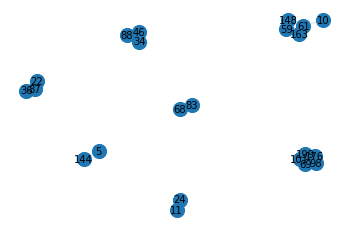

In [13]:
import matplotlib.pyplot as plt
import networkx as nx

Gexp = nx.Graph()

l = len(tweets_exp)
for i in range(l):
    for j in range(i+1, l):
        if cosine_similarity(df_exp)[i][j] != 0:
            print(i, j)
            Gexp.add_edge(str(i), str(j), weight = cosine_similarity(df_exp)[i][j])
#         sc = abs(score[i] - score[j])
        #if  sc != 0:
#         Gexp.add_edge(str(i), str(j), weight = sc)

e = [(u, v) for (u, v, d) in Gexp.edges(data=True)]

pos = nx.spring_layout(Gexp)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(Gexp, pos, node_size=200)

# edges
nx.draw_networkx_edges(Gexp, pos, edgelist=e,
                       width=.1)
# labels
nx.draw_networkx_labels(Gexp, pos, font_size=10, font_family='sans-serif')

plt.axis('off')
plt.show()

In [14]:
vexp = Gexp.number_of_nodes()
Gexp.number_of_edges()

26

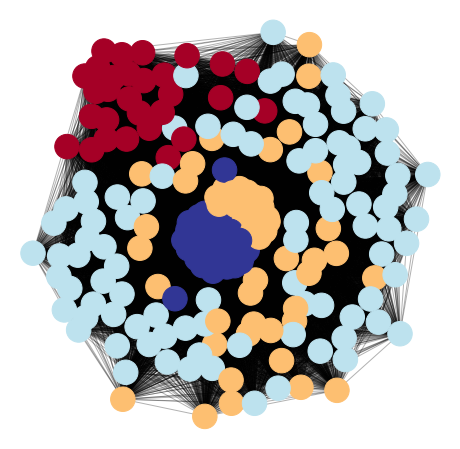

In [15]:
#plot of abstraction graph
import community
partitiona = community.best_partition(Gabs)
posa = nx.spring_layout(Gabs)
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx_nodes(Gabs, posa, node_size=600, cmap=plt.cm.RdYlBu, node_color=list(partitiona.values()))
nx.draw_networkx_edges(Gabs, posa, alpha=0.3)
plt.show(Gabs)

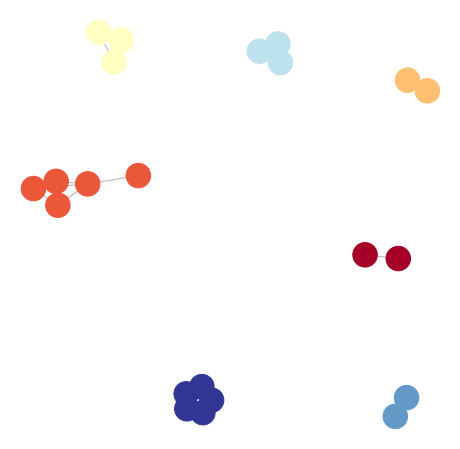

In [16]:
#plot of expression graph
import community
partitionb = community.best_partition(Gexp)
posb = nx.spring_layout(Gexp)
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx_nodes(Gexp, posb, node_size=600, cmap=plt.cm.RdYlBu, node_color=list(partitionb.values()))
nx.draw_networkx_edges(Gexp, posb, alpha=0.3)
plt.show(Gexp)

In [17]:
from collections import Counter
count_abs = Counter(partitiona.values())
count_exp = Counter(partitionb.values())
print("clusters in abstraction graph: ", count_abs)
print("clusters in expression graph: ", count_exp)

clusters in abstraction graph:  Counter({2: 92, 1: 59, 3: 47, 0: 29})
clusters in expression graph:  Counter({1: 5, 6: 5, 3: 3, 4: 3, 0: 2, 2: 2, 5: 2})


In [18]:
m_abs = max(count_abs, key=count_abs.get)
m_exp = max(count_exp, key=count_exp.get)
v_abs = count_abs[m_abs]
v_exp = count_exp[m_exp]

In [19]:
abs_score = float(v_abs/len(list_of_tweets))
abs_score

0.4052863436123348

In [20]:
exp_score = float(v_exp/len(list_of_tweets))
exp_score

0.022026431718061675

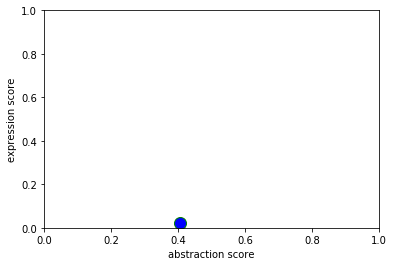

In [21]:
import matplotlib.pyplot as plt

plt.ylim(0, 1)
plt.xlim(0, 1)
plt.xlabel('abstraction score') 
# naming the y axis 
plt.ylabel('expression score') 
plt.plot(abs_score, exp_score, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)
plt.show()